In [24]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import 
from matplotlib import style

SyntaxError: invalid syntax (<ipython-input-24-e282c51dc1a9>, line 9)

In [4]:
#load data
df = pd.read_csv("titanic_train.csv")

#check features type
print(df.dtypes)

#check NaN or null values
print(df.isna().values.any())

#dcheck total missing values
print(df.isnull().sum())


passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
survived          int64
dtype: object
True
passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64


In [6]:
#data cleansing per feature
#replace using median
median = df["age"].median()
df["age"].fillna(median, inplace=True)

median = df["fare"].median()
df["fare"].fillna(median, inplace=True)

# median = df["embarked"].median()
# df["embarked"].fillna(median, inplace=True)

# median = df["boat"].median()
# df["boat"].fillna(median, inplace=True)

median = df["body"].median()
df["body"].fillna(median, inplace=True)

# median = df["home.dest"].median()
# df["home.dest"].fillna(median, inplace=True)

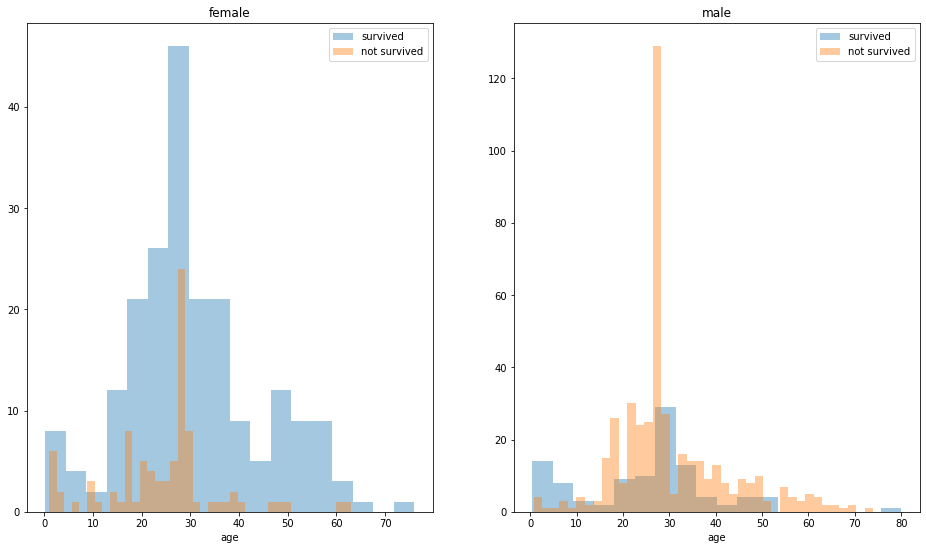

In [34]:
#analysis / searching for good features
survived = "survived"
notSurvived = "not survived"

#create diagram age
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,9))

women = df[df["sex"]=="female"]
men = df[df["sex"]=="male"]

ax = sb.distplot(women[women["survived"]==1].age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sb.distplot(women[women["survived"]==0].age.dropna(), bins=40, label=notSurvived, ax=axes[0], kde=False)
ax.legend()
ax.set_title("female")
ax = sb.distplot(men[men["survived"]==1].age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax = sb.distplot(men[men["survived"]==0].age.dropna(), bins=40, label=notSurvived, ax=axes[1], kde=False)

ax.legend()
_ = ax.set_title("male")



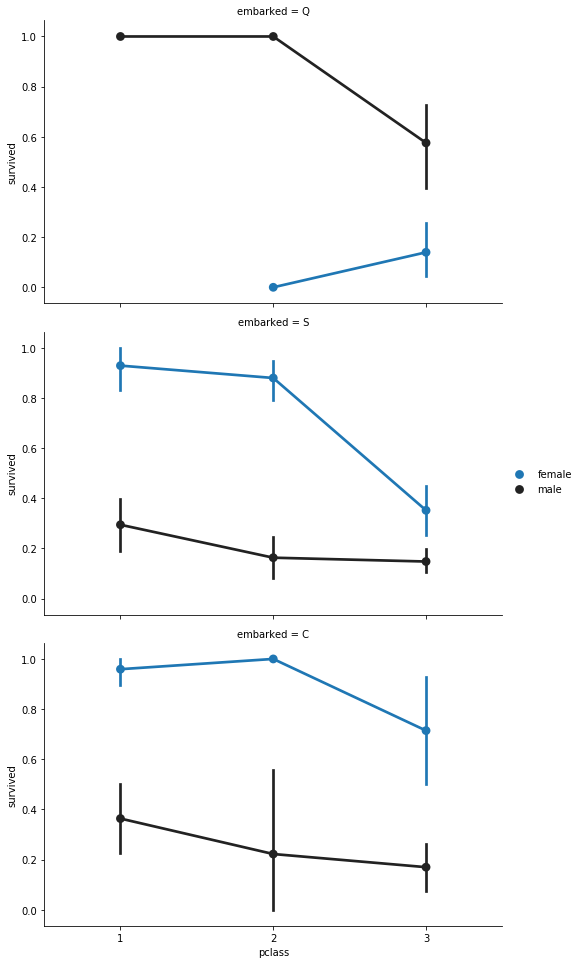

In [35]:
#create embarked, pclass, sex plot
FaceGrid = sb.FacetGrid(df, row="embarked", size=4.5, aspect=1.6)
FaceGrid.map(sb.pointplot, "pclass", "survived", "sex", palette=None, order=None, hue_order=None)
FaceGrid.add_legend()

In [ ]:
#women on port Q and on port S have a higher chance of survival. the inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

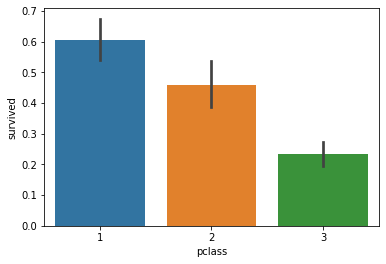

In [47]:
#create Pclass diagram
sb.barplot(x="pclass", y="survived", data=df)

In [61]:
#training proces
#still on progress, features used must 3e age, fare, embarked, pclKNeighborsClassifier(n_neighbors=4).fit(train[["age", "fare"]], train["survived"])

In [64]:
#evaluate
newClassification = KNN.predict([[17,8],[8,10]])
print(newClassification)

classification = KNN.predict(test[["age", "fare"]])
accuracy = accuracy_score(test["survived"], classification)
MAE = mean_absolute_error(test["survived"], classification)
MSE = mean_squared_error(test["survived"], classification)

print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)

[0 1]
 ACC : 0.66
 MAE : 0.34
 MSE : 0.34


In [65]:
#identify the best K
Ks = 10
accuracy = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):    
    KNN = KNeighborsClassifier(n_neighbors = n).fit(train[["age", "fare"]], train["survived"])  
    classification = KNN.predict(test[["age", "fare"]])
    accuracy[n - 1] = accuracy_score(test["survived"], classification)
    
print("Best  ACC : %.2f" % accuracy.max(), ", with k = ", accuracy.argmax() + 1)

Best  ACC : 0.72 , with k =  7
